Q-Learning from scratch for Example 6.6: Cliff Walking from the Sutton & Barto book (page 132).

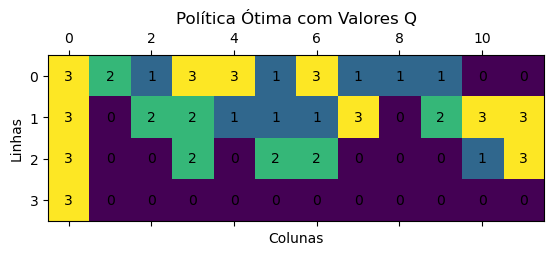

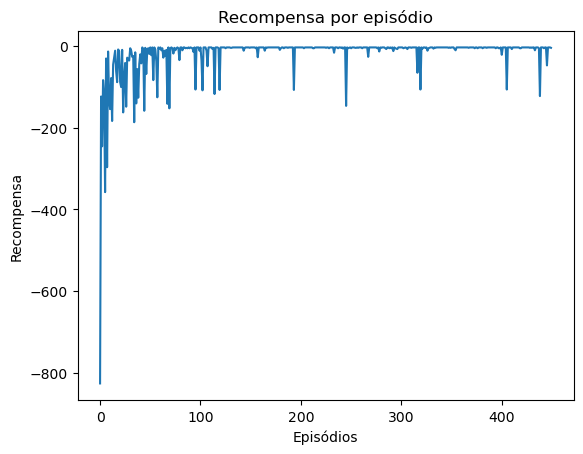

In [355]:
import numpy as np
import matplotlib.pyplot as plt

# 
num_states = 48
num_actions = 4
start_state = 0
goal_state = 47
cliff_states = np.arange(37, 47)


# 
alpha = 0.1  # Taxa de aprendizado
gamma = 1    # Fator de desconto
epsilon = 0.1  # Taxa de exploração
num_episodes = 450

actions = {0: -1,  # Esquerda
           1: 1,   # Direita
           2: -12, # Cima
           3: 12}  # Baixo

# Inicializar a tabela Q
Q = np.zeros((num_states, num_actions))

# Função para escolher ação
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(num_actions)
    else:
        action = np.argmax(Q[state, :])
    return action

# Algoritmo Q-Learning
total_rewards = []
for episode in range(num_episodes):
    state = start_state
    episode_reward = 0
    while state != goal_state:
        action = choose_action(state)
        move = actions[action]
        next_state = state + move
        next_state = max(0, min(next_state, num_states - 1))
        if next_state in cliff_states:
            reward = -100
            next_state = start_state
        else:
            reward = -1
        episode_reward += reward
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state
    total_rewards.append(episode_reward)

# Plotar recompensa por episódio
def plot_reward():
    plt.plot(total_rewards)
    plt.xlabel('Episódios')
    plt.ylabel('Recompensa')
    plt.title('Recompensa por episódio')
    plt.show()
plot_reward()

# Plotar política ótima
def plot_optimal_policy():
    optimal_policy = np.argmax(Q, axis=1)
    optimal_policy = np.reshape(optimal_policy, (4, 12))
    
    fig, ax = plt.subplots()
    ax.matshow(optimal_policy, cmap='viridis')
    
    for i in range(optimal_policy.shape[0]):
        for j in range(optimal_policy.shape[1]):
            ax.text(j, i, str(optimal_policy[i, j]), va='center', ha='center')
    
    plt.xlabel('Colunas')
    plt.ylabel('Linhas')
    plt.title('Política Ótima com Valores Q')
    plt.show()

plot_optimal_policy()
